#### Decomposing a matrix using SVD ####

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
A = np.array([3,1,1,2]).reshape(2,2)
print(f"Matrix A:\n{A}")

Matrix A:
[[3 1]
 [1 2]]


#### Numpy gives us the tools to do the Singular Value Decomposition and gather the left, right singular matrices and singular values ####

In [3]:
# Decomposing using np.linalg

svd_decompose = np.linalg.svd(A)
print(f"U matrix:\n{svd_decompose[0]}\n\nsigma:\n{np.diag(svd_decompose[1]).round(2)}\n\nV-Transpose:\n{svd_decompose[2]}")

U matrix:
[[-0.85065081 -0.52573111]
 [-0.52573111  0.85065081]]

sigma:
[[3.62 0.  ]
 [0.   1.38]]

V-Transpose:
[[-0.85065081 -0.52573111]
 [-0.52573111  0.85065081]]


In [4]:
# let us separate the matrices
U = svd_decompose[0]
V_T = svd_decompose[2]
sigma = svd_decompose[1]

#### Let us take the first column of the U matrix and project the first row of A onto that ####

Remember, columns of U help u find the patterns or structure or importance of rows of matrix A

In [5]:
# First row of A
A_row1 = np.array(A[0])
print(f"Row 1 is: {A_row1}")

Row 1 is: [3 1]


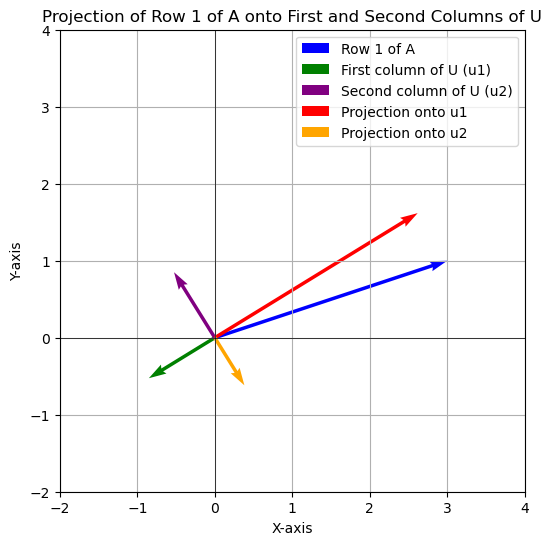

In [6]:
# First and second columns of U (simplified to 2D for visualization)
u1 = U[:, 0]  # First left singular vector
u2 = U[:, 1]  # Second left singular vector

# Project row 1 of A onto u1 and u2
projection_u1 = (np.dot(A_row1, u1) / np.dot(u1, u1)) * u1
projection_u2 = (np.dot(A_row1, u2) / np.dot(u2, u2)) * u2

# Plot the original vector (first row of A) and its projection onto u1 and u2
plt.figure(figsize=(6,6))

# Plot the original vector A_row1
plt.quiver(0, 0, A_row1[0], A_row1[1], angles='xy', scale_units='xy', scale=1, color='blue', label='Row 1 of A')

# Plot the first singular vector u1
plt.quiver(0, 0, u1[0], u1[1], angles='xy', scale_units='xy', scale=1, color='green', label='First column of U (u1)')

# Plot the second singular vector u2
plt.quiver(0, 0, u2[0], u2[1], angles='xy', scale_units='xy', scale=1, color='purple', label='Second column of U (u2)')

# Plot the projection of A_row1 onto u1
plt.quiver(0, 0, projection_u1[0], projection_u1[1], angles='xy', scale_units='xy', scale=1, color='red', label='Projection onto u1')

# Plot the projection of A_row1 onto u2
plt.quiver(0, 0, projection_u2[0], projection_u2[1], angles='xy', scale_units='xy', scale=1, color='orange', label='Projection onto u2')

# Set the plot limits
plt.xlim(-2, 4)
plt.ylim(-2, 4)

# Add grid and labels
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend()

# Add labels to the plot
plt.title("Projection of Row 1 of A onto First and Second Columns of U")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Show plot
plt.show()


#### Let us take another matrix and analyze the singular values and their meaning

In [7]:
B = np.array([1,10,3,-4,8,13,6,11,0,2,5,-2]).reshape(4,3)
B

array([[ 1, 10,  3],
       [-4,  8, 13],
       [ 6, 11,  0],
       [ 2,  5, -2]])

In [8]:
# SVD
b_decomposed = np.linalg.svd(B)

U = b_decomposed[0]
sigma = b_decomposed[1]
V_T = b_decomposed[2]

print(f"U:\n{U}\n\nsigma:\n{np.diag(sigma)}\n\nV_T:\n{V_T}")

U:
[[ 0.51783836 -0.17869382 -0.5800768  -0.60284564]
 [ 0.67246228  0.68345458  0.1243761   0.25537211]
 [ 0.49956677 -0.6103839   0.61441812  0.01883893]
 [ 0.17340983 -0.3583153  -0.52012677  0.75565026]]

sigma:
[[19.66340688  0.          0.        ]
 [ 0.         12.59481348  0.        ]
 [ 0.          0.          1.92901613]]

V_T:
[[ 0.05961376  0.86050019  0.50595022]
 [-0.5789245  -0.38310222  0.71977713]
 [ 0.813199   -0.3358156   0.47532648]]


From the above decomposition, we are seeing that  the the 3rd singular value is much smaller that the first 2 and hence the contribution from the dimension covered by it is negligible.<br><br>
The first 2 rows of U correspond to the contributions of the first two singular values (which are the dominant components) in describing the rows (data points).<br>
The first 2 columns of VT​ represent the most important features or directions in the data.<br><br>
So, we can compute the reduced dimensions of the original matrix and use it for futher analysis.<br>
The reduced dimersions matrix is for by doing $ U.\Sigma.V^T $ of the first 2 rows.

In [9]:
reduced_B = np.dot(np.dot(U[:,0:2],np.diag(sigma[0:2])),V_T[0:2])
print(f"Reduced matrix, also known as the __Principal Components__:\n{reduced_B}")

Reduced matrix, also known as the __Principal Components__:
[[ 1.90995139  9.6242299   3.53187964]
 [-4.19510555  8.08057005 12.885958  ]
 [ 5.03617827 11.39801619 -0.56336763]
 [ 2.81590935  4.66306515 -1.52308928]]
